In [4]:
# initialization
import matplotlib.pyplot as plt
import numpy as np
import time

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble
import qiskit

# import basic plot tools
from qiskit.visualization import plot_histogram

qiskit.__qiskit_version__


{'qiskit-terra': '0.17.2', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.12.3', 'qiskit-aqua': '0.9.1', 'qiskit': '0.25.4', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [2]:
backendObject = Aer.get_backend('qasm_simulator')

In [3]:
def buildBernsteinVaziraniCircuit(n, bitMask) :
    
    s = bitMask
    print(s)
    
    # We need a circuit with n qubits, plus one auxiliary qubit
    # Also need n classical bits to write the output to
    bv_circuit = QuantumCircuit(n+1, n)

    # put auxiliary in state |->
    bv_circuit.h(n)
    bv_circuit.z(n)

    # Apply Hadamard gates before querying the oracle
    for i in range(n):
        bv_circuit.h(i)
    
    # Apply barrier 
    bv_circuit.barrier()

    # Apply the inner-product oracle
    s = s[::-1] # reverse s to fit qiskit's qubit ordering
    for q in range(n):
        if s[q] == '0':
            bv_circuit.i(q)
        else:
            bv_circuit.cx(q, n)
        
    # Apply barrier 
    bv_circuit.barrier()

    #Apply Hadamard gates after querying the oracle
    for i in range(n):
        bv_circuit.h(i)

    # Measurement
    for i in range(n):
        bv_circuit.measure(i, i)
        
    return bv_circuit

In [10]:
def generateEndianBitMap(numberOfQubits) :
    #endianRep = "{0:b}".format(numberOfQubits)
    #bitMapLength = len(endianRep)
    #zeroPadding = '0' * (numberOfQubits - bitMapLength)
    endianRep = '10' * int(numberOfQubits / 2)
    return endianRep

In [11]:
def runBernsteinVaziraniAlgorithm(numberOfQubits) :
    timeBefore = time.perf_counter()
    bitMask = generateEndianBitMap(numberOfQubits)
    bernsteinVaziraniCircuit = buildBernsteinVaziraniCircuit(numberOfQubits, bitMask)
    quantumObject = assemble(bernsteinVaziraniCircuit)
    results = backendObject.run(quantumObject).result()
    timeAfter = time.perf_counter()
    totalElapsedTime = timeAfter - timeBefore   
    formattedTotalElapsedTime = "{:.4f}".format(totalElapsedTime)  
    print("[" + str(numberOfQubits) + "] Time: " + str(formattedTotalElapsedTime))
    return results

1010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010
[520] Time: 2.7708


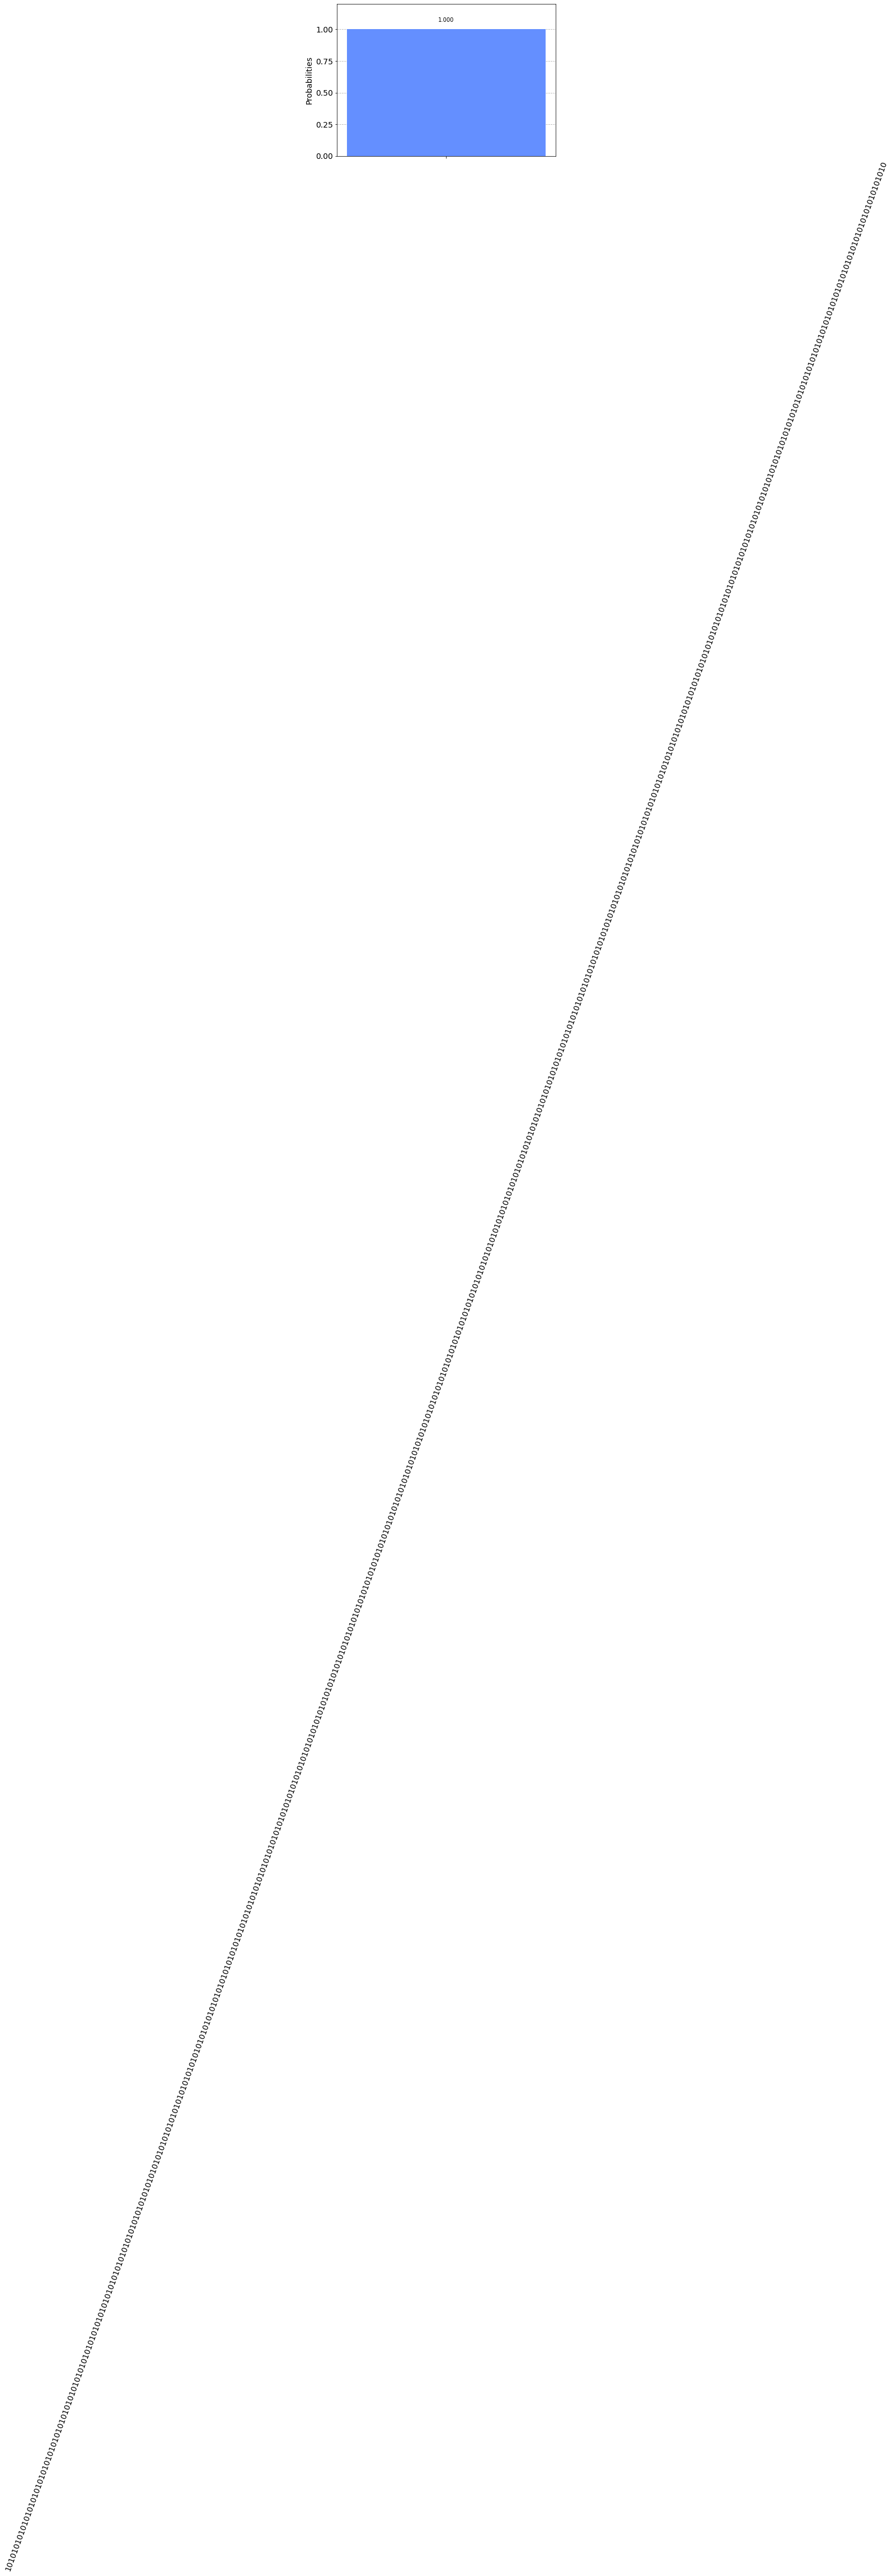

In [18]:
result = runBernsteinVaziraniAlgorithm(520)
plot_histogram(result.get_counts())


In [3]:
qiskit.__qiskit_version__

NameError: name 'qiskit' is not defined